<a href="https://colab.research.google.com/github/NicoloAvesani/social_research/blob/main/Copia_di_Emigration_from_italy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# social research project

https://www.kaggle.com/datasets/luigigno/italy-immigration-data-by-the-un

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
italy_emi_data = pd.read_excel('Italy.xlsx')

In [4]:
italy_emi_data.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Emigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,..,...,1,0,1,0,8,11,13,14,8,19
1,Emigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,..,...,674,929,910,836,925,1110,1495,1525,1794,2296
2,Emigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,..,...,104,82,81,75,127,149,152,165,140,159
3,Emigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,..,...,0,0,2,3,2,3,0,0,2,4
4,Emigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,..,...,12,10,12,4,7,9,35,7,11,22


In [5]:
italy_emi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      388 non-null    object
 1   Coverage  388 non-null    object
 2   OdName    388 non-null    object
 3   AREA      388 non-null    int64 
 4   AreaName  388 non-null    object
 5   REG       388 non-null    int64 
 6   RegName   388 non-null    object
 7   DEV       388 non-null    int64 
 8   DevName   388 non-null    object
 9   1980      388 non-null    object
 10  1981      388 non-null    object
 11  1982      388 non-null    object
 12  1983      388 non-null    object
 13  1984      388 non-null    object
 14  1985      388 non-null    object
 15  1986      388 non-null    object
 16  1987      388 non-null    object
 17  1988      388 non-null    object
 18  1989      388 non-null    object
 19  1990      388 non-null    object
 20  1991      388 non-null    object
 21  1992      388 no

In [6]:
italy_emi_data.replace(['..'],0, inplace = True)

In [7]:
italy_emi_data = italy_emi_data[italy_emi_data['Type'] == 'Emigrants']
italy_emi_data = italy_emi_data.drop(italy_emi_data.index[-2:])
italy_emi_data

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Emigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,0,...,1,0,1,0,8,11,13,14,8,19
1,Emigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,0,...,674,929,910,836,925,1110,1495,1525,1794,2296
2,Emigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,0,...,104,82,81,75,127,149,152,165,140,159
3,Emigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,2,3,2,3,0,0,2,4
4,Emigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,0,...,12,10,12,4,7,9,35,7,11,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Emigrants,Foreigners,Wallis and Futuna Islands,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,0,0,1,1,1,0,0,0
186,Emigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,0,...,0,1,0,0,2,2,2,0,5,0
187,Emigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,0,...,8,2,0,7,2,2,0,4,0,7
188,Emigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,0,...,7,0,4,0,3,3,0,1,0,1


In [8]:
italy_emi_data.rename(columns={'OdName':'Country'}, inplace=True)

In [9]:
italy_emi_data['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       'China (including Hong Kong Special Administrative Region)',
       'China, Taiwan Province of China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Et

In [10]:
# since there is ITALY as country of departure, we have to remove it

italy_emi_data = italy_emi_data[italy_emi_data.Country != 'Italy']
italy_emi_data

,Type,Coverage,Country,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Emigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,0,...,1,0,1,0,8,11,13,14,8,19
1,Emigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,0,...,674,929,910,836,925,1110,1495,1525,1794,2296
2,Emigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,0,...,104,82,81,75,127,149,152,165,140,159
3,Emigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,2,3,2,3,0,0,2,4
4,Emigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,0,...,12,10,12,4,7,9,35,7,11,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Emigrants,Foreigners,Wallis and Futuna Islands,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,0,0,1,1,1,0,0,0
186,Emigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,0,...,0,1,0,0,2,2,2,0,5,0
187,Emigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,0,...,8,2,0,7,2,2,0,4,0,7
188,Emigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,0,...,7,0,4,0,3,3,0,1,0,1


In [11]:
for i in italy_emi_data.index:
  if italy_emi_data['Country'][i] == 'China (including Hong Kong Special Administrative Region)':
    italy_emi_data['Country'][i] = 'China'

/var/folders/35/gtdh9mrn0rs1gwn1793s3zvr0000gn/T/ipykernel_1013/2961352069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_emi_data['Country'][i] = 'China'


In [12]:
italy_emi_data[1995]

0        0
1      147
2        0
3        0
4        0
      ... 
185      0
186      0
187      0
188      0
189      0
Name: 1995, Length: 189, dtype: int64

In [13]:
italy_mask = italy_emi_data['Country'] == 'Italy'
italy_emi_data[italy_mask]

,Type,Coverage,Country,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


In [14]:
# there are 3 columns 'AREA','REG','DEV' that are not useful, as they represent code--> drop them

italy_emi_data = italy_emi_data.drop(['AREA', 'REG', 'DEV'], axis=1)

In [15]:
# since I want to understand the total number of migrants from every country, I add the 'Total' column
italy_emi_data['Total'] = italy_emi_data.sum(axis=1)

/var/folders/35/gtdh9mrn0rs1gwn1793s3zvr0000gn/T/ipykernel_1013/3180193850.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  italy_emi_data['Total'] = italy_emi_data.sum(axis=1)


In [16]:
italy_emi_data.columns

Index([    'Type', 'Coverage',  'Country', 'AreaName',  'RegName',  'DevName',
             1980,       1981,       1982,       1983,       1984,       1985,
             1986,       1987,       1988,       1989,       1990,       1991,
             1992,       1993,       1994,       1995,       1996,       1997,
             1998,       1999,       2000,       2001,       2002,       2003,
             2004,       2005,       2006,       2007,       2008,       2009,
             2010,       2011,       2012,       2013,    'Total'],
      dtype='object')

In [17]:
italy_emi_data = italy_emi_data.drop(columns = [1980,       1981,       1982,       1983,       1984,       1985,
             1986,       1987,       1988,       1989,       1990,       1991,
             1992,       1993,       1994,     2001,])

In [18]:
df_sorted_emi = italy_emi_data.sort_values(by='Total', ascending=False)

In [19]:
for i in df_sorted_emi.index:
  if df_sorted_emi['AreaName'][i] == 'Latin America and the Caribbean':
    df_sorted_emi['AreaName'][i] = 'South America'
  elif df_sorted_emi['AreaName'][i] == 'Northern America':
    df_sorted_emi['AreaName'][i] = 'North America'


df_sorted_emi['AreaName'].unique()

/var/folders/35/gtdh9mrn0rs1gwn1793s3zvr0000gn/T/ipykernel_1013/1317687437.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_emi['AreaName'][i] = 'North America'
/var/folders/35/gtdh9mrn0rs1gwn1793s3zvr0000gn/T/ipykernel_1013/1317687437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted_emi['AreaName'][i] = 'South America'


array(['Europe', 'Africa', 'Asia', 'North America', 'South America',
       'Oceania', 'World'], dtype=object)

In [20]:
df_sorted_emi

,Type,Coverage,Country,AreaName,RegName,DevName,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
136,Emigrants,Foreigners,Romania,Europe,Eastern Europe,Developed regions,71,87,109,119,...,1028,1251,3742,8308,9924,7488,7693,9131,11014,61792
64,Emigrants,Foreigners,Germany,Europe,Western Europe,Developed regions,959,663,503,566,...,970,872,1087,1353,1639,1142,1249,1330,1291,20137
112,Emigrants,Foreigners,Morocco,Africa,Northern Africa,Developing regions,351,336,434,369,...,1029,1098,1010,1046,1178,2179,1761,1960,2418,19450
1,Emigrants,Foreigners,Albania,Europe,Southern Europe,Developed regions,147,206,197,305,...,929,910,836,925,1110,1495,1525,1794,2296,15395
131,Emigrants,Foreigners,Poland,Europe,Eastern Europe,Developed regions,110,108,100,129,...,323,567,988,1700,2053,1429,1433,1417,1628,12854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Emigrants,Foreigners,Tonga,Oceania,Polynesia,Developing regions,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
182,Emigrants,Foreigners,Vanuatu,Oceania,Melanesia,Developing regions,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
37,Emigrants,Foreigners,Comoros,Africa,Eastern Africa,Developing regions,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
167,Emigrants,Foreigners,Timor-Leste,Asia,South-Eastern Asia,Developing regions,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [21]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [23]:
import plotly.express as px

region = str(input('Insert part of the world'))


df_area_mask = df_sorted_emi['AreaName'] == region
df_area = df_sorted_emi[df_area_mask]

country_list_world = df_area['Country']
total_list_world = df_area['Total']

data = {
    'Country': country_list_world,
    'Value': total_list_world
}

df = pd.DataFrame(data)

fig = px.choropleth(
    df,
    locations='Country',
    locationmode='country names',
    scope= region.lower(),
    color='Value',
    color_continuous_scale='Viridis',
    range_color=(0, df['Value'].max()),
    labels={'Value': 'Value'},
    title='Immigrants to Italy between 1995 and 2013 from '+ region
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    margin={"r": 0, "t": 30, "l": 0, "b": 0}
)

fig.show()


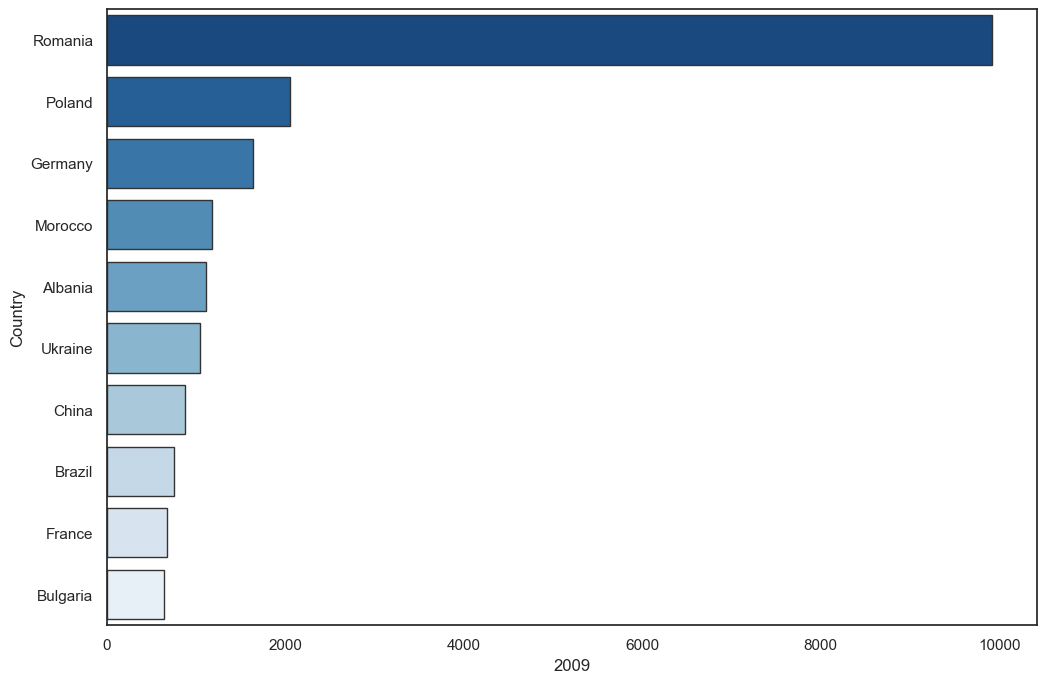

In [24]:
# let's see the main country

year = int(input('give the year:  '))
plt.figure(figsize=(12,8))
sb.set(style="white")
df_sorted_year = df_sorted_emi.sort_values(by=year, ascending=False)
sb.barplot(x=df_sorted_year[year].head(10), y=df_sorted_year['Country'].head(10),
            palette="Blues_r", edgecolor=".2");

In [25]:
top_10_year_input = df_sorted_year.head(10)
top_10_year_input

,Type,Coverage,Country,AreaName,RegName,DevName,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
136,Emigrants,Foreigners,Romania,Europe,Eastern Europe,Developed regions,71,87,109,119,...,1028,1251,3742,8308,9924,7488,7693,9131,11014,61792
131,Emigrants,Foreigners,Poland,Europe,Eastern Europe,Developed regions,110,108,100,129,...,323,567,988,1700,2053,1429,1433,1417,1628,12854
64,Emigrants,Foreigners,Germany,Europe,Western Europe,Developed regions,959,663,503,566,...,970,872,1087,1353,1639,1142,1249,1330,1291,20137
112,Emigrants,Foreigners,Morocco,Africa,Northern Africa,Developing regions,351,336,434,369,...,1029,1098,1010,1046,1178,2179,1761,1960,2418,19450
1,Emigrants,Foreigners,Albania,Europe,Southern Europe,Developed regions,147,206,197,305,...,929,910,836,925,1110,1495,1525,1794,2296,15395
175,Emigrants,Foreigners,Ukraine,Europe,Eastern Europe,Developed regions,8,5,1,8,...,582,648,671,875,1044,1211,1212,1440,1698,10001
34,Emigrants,Foreigners,China,Asia,Eastern Asia,Developing regions,40,62,85,0,...,759,904,760,728,879,1517,1672,1773,1943,12474
22,Emigrants,Foreigners,Brazil,South America,South America,Developing regions,207,240,129,184,...,386,478,495,637,758,670,620,753,724,8008
60,Emigrants,Foreigners,France,Europe,Western Europe,Developed regions,476,489,406,440,...,582,621,672,559,679,781,786,798,830,12739
24,Emigrants,Foreigners,Bulgaria,Europe,Eastern Europe,Developed regions,0,0,0,21,...,85,77,272,540,640,448,401,539,728,3910


In [26]:
country_list = list(top_10_year_input['Country'])
total_list = list(top_10_year_input[year])

In [42]:
import plotly.express as px

# Sample data
data = {
    'Country': country_list,
    'Value': total_list
}

df = pd.DataFrame(data)

fig = px.choropleth(
    df,
    locations='Country',
    locationmode='country names',
    color='Value',
    color_continuous_scale='Viridis',
    range_color=(0, df['Value'].max()),
    labels={'Value': 'Value'},
    title='Top 10 Countries of Departure in '+ str(year),
    scope='world'
)

fig.update_geos(showcountries = True)
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    margin={"r": 0, "t": 30, "l": 0, "b": 0}
)
fig.show()



In [43]:
country_list_global = list(df_sorted_emi['Country'])
total_list_global = list(df_sorted_emi['Total'])

# plot the global countries per immigration
data = {
    'Country': country_list_global,
    'Value': total_list_global
}

df = pd.DataFrame(data)

fig = px.choropleth(
    df,
    locations='Country',
    locationmode='country names',
    color='Value',
    color_continuous_scale='Viridis',
    range_color=(0, df['Value'].max()),
    labels={'Value': 'Value'},
    title='World'
)

fig.update_geos(showcountries = True)
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    margin={"r": 0, "t": 30, "l": 0, "b": 0}
)

fig.show()

In [29]:
'''import pandas as pd
import matplotlib.pyplot as plt

#Filter DataFrame for the desired year
year = int(input("Enter a year between 2002 and 2013: "))
df_year = italy_imm_data[['Country', (year)]]


#Sort countries based on the number of immigrants
df_year_sorted = df_year.sort_values(by=year, ascending=False)

#Select top 10 countries
top_10_countries = df_year_sorted.head(10)

# Step 5: Plot the results
plt.bar(top_10_countries['Country'], top_10_countries[year])
plt.xlabel('Country')
plt.ylabel('Number of Immigrants')
plt.title(f'Top 10 Countries with the Highest Number of Immigrants in {year}')
plt.xticks(rotation=90)
plt.show()'''


'import pandas as pd\nimport matplotlib.pyplot as plt\n\n#Filter DataFrame for the desired year\nyear = int(input("Enter a year between 2002 and 2013: "))\ndf_year = italy_imm_data[[\'Country\', (year)]]\n\n\n#Sort countries based on the number of immigrants\ndf_year_sorted = df_year.sort_values(by=year, ascending=False)\n\n#Select top 10 countries\ntop_10_countries = df_year_sorted.head(10)\n\n# Step 5: Plot the results\nplt.bar(top_10_countries[\'Country\'], top_10_countries[year])\nplt.xlabel(\'Country\')\nplt.ylabel(\'Number of Immigrants\')\nplt.title(f\'Top 10 Countries with the Highest Number of Immigrants in {year}\')\nplt.xticks(rotation=90)\nplt.show()'

In [30]:
'''fig, ax = plt.subplots(figsize=(10, 6))
top_10_year_df = df_year_sorted.head(10)
plt.barh(top_10_year_df['Country'], top_10_year_df[year])'''

"fig, ax = plt.subplots(figsize=(10, 6))\ntop_10_year_df = df_year_sorted.head(10)\nplt.barh(top_10_year_df['Country'], top_10_year_df[year])"

In [31]:
'''fig, ax = plt.subplots(figsize=(15, 8))
dff = top_10_year_df[::-1]
ax.barh(dff['Country'], dff[year])
for i, (value, name) in enumerate(zip( dff[year],dff['Country'])):

    ax.text(value, i,     value, ha='left')

ax.text(1, 0.4, year, transform=ax.transAxes, size=46, ha='right')'''

"fig, ax = plt.subplots(figsize=(15, 8))\ndff = top_10_year_df[::-1]\nax.barh(dff['Country'], dff[year])\nfor i, (value, name) in enumerate(zip( dff[year],dff['Country'])):\n\n    ax.text(value, i,     value, ha='left')\n\nax.text(1, 0.4, year, transform=ax.transAxes, size=46, ha='right')"

In [32]:
pip install bar_chart_race

Note: you may need to restart the kernel to use updated packages.


In [33]:
italy_emi_data.T

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
Type,Emigrants,Emigrants,Emigrants,Emigrants,Emigrants,Emigrants,Emigrants,Emigrants,Emigrants,Emigrants,...,Emigrants,Emigrants,Emigrants,Emigrants,Emigrants,Emigrants,Emigrants,Emigrants,Emigrants,Emigrants
Coverage,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,...,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners
Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Yemen,Zambia,Zimbabwe,Stateless
AreaName,Asia,Europe,Africa,Europe,Africa,Latin America and the Caribbean,Latin America and the Caribbean,Asia,Oceania,Europe,...,Latin America and the Caribbean,Asia,Oceania,Latin America and the Caribbean,Asia,Oceania,Asia,Africa,Africa,World
RegName,Southern Asia,Southern Europe,Northern Africa,Southern Europe,Middle Africa,Caribbean,South America,Western Asia,Australia and New Zealand,Western Europe,...,South America,Central Asia,Melanesia,South America,South-Eastern Asia,Polynesia,Western Asia,Eastern Africa,Eastern Africa,World
DevName,Developing regions,Developed regions,Developing regions,Developed regions,Developing regions,Developing regions,Developing regions,Developing regions,Developed regions,Developed regions,...,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,World
1995,0,147,0,0,0,0,268,0,0,0,...,0,0,0,75,0,0,0,0,0,0
1996,0,206,0,0,0,0,154,0,0,0,...,0,0,0,61,0,0,0,0,0,0
1997,0,197,0,0,0,0,128,0,0,0,...,0,0,0,28,0,0,0,0,0,0
1998,3,305,17,0,13,0,96,1,65,97,...,9,3,0,32,3,0,1,6,0,1


In [34]:
df = italy_emi_data.T
df = df.drop(df.index[:6])
df.columns = italy_emi_data['Country'].unique()
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Yemen,Zambia,Zimbabwe,Stateless
1995,0,147,0,0,0,0,268,0,0,0,...,0,0,0,75,0,0,0,0,0,0
1996,0,206,0,0,0,0,154,0,0,0,...,0,0,0,61,0,0,0,0,0,0
1997,0,197,0,0,0,0,128,0,0,0,...,0,0,0,28,0,0,0,0,0,0
1998,3,305,17,0,13,0,96,1,65,97,...,9,3,0,32,3,0,1,6,0,1
1999,6,327,44,0,10,0,86,4,56,98,...,9,2,0,22,3,0,0,5,2,1
2000,1,443,46,0,2,0,97,6,57,99,...,22,0,1,46,3,0,2,1,1,1
2002,0,558,36,0,18,7,83,7,99,101,...,5,10,0,23,5,0,0,1,1,0
2003,2,718,71,0,14,4,181,2,89,156,...,8,2,0,57,5,0,0,2,0,2
2004,1,674,104,0,12,4,227,2,71,155,...,14,6,0,112,17,0,0,8,7,0
2005,0,929,82,0,10,0,274,1,90,154,...,24,9,0,79,8,0,1,2,0,3


In [35]:
df = df.drop(df.index[-1:])

In [36]:
years = ['1995', '1996', '1997', '1998', '1999', '2000', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']

df['year'] = years
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Yemen,Zambia,Zimbabwe,Stateless,year
1995,0,147,0,0,0,0,268,0,0,0,...,0,0,75,0,0,0,0,0,0,1995
1996,0,206,0,0,0,0,154,0,0,0,...,0,0,61,0,0,0,0,0,0,1996
1997,0,197,0,0,0,0,128,0,0,0,...,0,0,28,0,0,0,0,0,0,1997
1998,3,305,17,0,13,0,96,1,65,97,...,3,0,32,3,0,1,6,0,1,1998
1999,6,327,44,0,10,0,86,4,56,98,...,2,0,22,3,0,0,5,2,1,1999
2000,1,443,46,0,2,0,97,6,57,99,...,0,1,46,3,0,2,1,1,1,2000
2002,0,558,36,0,18,7,83,7,99,101,...,10,0,23,5,0,0,1,1,0,2002
2003,2,718,71,0,14,4,181,2,89,156,...,2,0,57,5,0,0,2,0,2,2003
2004,1,674,104,0,12,4,227,2,71,155,...,6,0,112,17,0,0,8,7,0,2004
2005,0,929,82,0,10,0,274,1,90,154,...,9,0,79,8,0,1,2,0,3,2005


In [37]:
df =  df.set_index('year')
df = df.astype(int)

In [38]:
import matplotlib
matplotlib.rcParams['animation.ffmpeg_path'] = '/path/to/ffmpeg'

In [39]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install ffmpeg

Note: you may need to restart the kernel to use updated packages.


In [41]:
import bar_chart_race as bcr
bcr.bar_chart_race(
    df = df,
    title = 'Number of immigrants arriving in Italy per Year',
    label_bars=True,
    n_bars = 10,
    orientation = 'h',
    cmap = 'prism',
    period_length=2000,
    fixed_max = True
)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 127 () missing from current font.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 128 (\x80) missing from current font.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 129 (\x81) missing from current font.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 130 (\x82) missing from current font.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyph 131 (\x83) missing from current font.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bar_chart_race/_make_chart.py:284: UserWarning:

Glyp

Exception: You do not have ffmpeg installed on your machine. Download
                            ffmpeg from here: https://www.ffmpeg.org/download.html.
                            
                            Matplotlib's original error message below:

                            Requested MovieWriter (ffmpeg) not available
                            

In [ ]:
df_sum = df.T
df_sum

In [ ]:
years_int = list(range(1996, 2001)) + list(range(2002, 2014))
for i in years_int:
  sum_year = []
  for j in range(len(df_sum)):
    if i != 2002:
      sum_year.append(df_sum[str(i-1)][j] + df_sum[str(i)][j])
    else:
      sum_year.append(df_sum[str(i-2)][j] + df_sum[str(i)][j])

  df_sum[str(i)] = sum_year

In [ ]:
df_sum.T

In [ ]:
bcr.bar_chart_race(
    df = df_sum.T,
    title = 'Total number of emigrants from Italy',
    label_bars=True,
    n_bars = 10,
    orientation = 'h',
    cmap = 'prism',
    period_length=2000,
    fixed_max = True
)

In [ ]:
def summary(values, ranks):
    total_deaths = int(round(values.sum(), -2))
    s = f'Total Emigrants - {total_deaths:,.0f}'
    return {'x': .99, 'y': .05, 's': s, 'ha': 'right', 'size': 8}

bcr.bar_chart_race(df_sum.T, period_summary_func=summary,    title = 'Total number of immigrants arrived in Italy',
    label_bars=True,
    n_bars = 10,
    orientation = 'h',
    cmap = 'prism',
    period_length=2000,
    fixed_max = True,
    #perpendicular_bar_func='mean'
                   )

In [44]:
europe_mask = df_sorted_emi['AreaName'] == 'Europe'
europe_df = df_sorted_emi[europe_mask]

In [45]:
europe_df

,Type,Coverage,Country,AreaName,RegName,DevName,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
136,Emigrants,Foreigners,Romania,Europe,Eastern Europe,Developed regions,71,87,109,119,...,1028,1251,3742,8308,9924,7488,7693,9131,11014,61792
64,Emigrants,Foreigners,Germany,Europe,Western Europe,Developed regions,959,663,503,566,...,970,872,1087,1353,1639,1142,1249,1330,1291,20137
1,Emigrants,Foreigners,Albania,Europe,Southern Europe,Developed regions,147,206,197,305,...,929,910,836,925,1110,1495,1525,1794,2296,15395
131,Emigrants,Foreigners,Poland,Europe,Eastern Europe,Developed regions,110,108,100,129,...,323,567,988,1700,2053,1429,1433,1417,1628,12854
60,Emigrants,Foreigners,France,Europe,Western Europe,Developed regions,476,489,406,440,...,582,621,672,559,679,781,786,798,830,12739
177,Emigrants,Foreigners,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,404,417,330,426,...,417,421,445,468,550,608,576,786,741,10167
175,Emigrants,Foreigners,Ukraine,Europe,Eastern Europe,Developed regions,8,5,1,8,...,582,648,671,875,1044,1211,1212,1440,1698,10001
135,Emigrants,Foreigners,Republic of Moldova,Europe,Eastern Europe,Developed regions,34,2,0,0,...,178,143,228,388,463,822,806,1090,1585,5892
166,Emigrants,Foreigners,The former Yugoslav Republic of Macedonia,Europe,Southern Europe,Developed regions,60,129,129,128,...,175,320,291,312,387,552,471,649,821,5093
162,Emigrants,Foreigners,Switzerland,Europe,Western Europe,Developed regions,198,211,193,199,...,187,207,220,254,304,293,247,253,277,4954


In [47]:
european_countries = list(europe_df['Country'])
european_countries

['Romania',
 'Germany',
 'Albania',
 'Poland',
 'France',
 'United Kingdom of Great Britain and Northern Ireland',
 'Ukraine',
 'Republic of Moldova',
 'The former Yugoslav Republic of Macedonia',
 'Switzerland',
 'Spain',
 'Bulgaria',
 'Netherlands',
 'Croatia',
 'Serbia',
 'Slovakia',
 'Austria',
 'Belgium',
 'Bosnia and Herzegovina',
 'Russian Federation',
 'Hungary',
 'Sweden',
 'Portugal',
 'Greece',
 'Slovenia',
 'Denmark',
 'Czech Republic',
 'Finland',
 'Ireland',
 'Lithuania',
 'Norway',
 'Belarus',
 'San Marino',
 'Latvia',
 'Malta',
 'Iceland',
 'Luxembourg',
 'Estonia',
 'Montenegro',
 'Monaco',
 'Andorra',
 'Liechtenstein',
 'Holy See']

In [49]:
asian_mask = df_sorted_emi['AreaName'] == 'Asia'
asia_df = df_sorted_emi[asian_mask]
asian_countries = list(asia_df['Country'])

north_america_mask = df_sorted_emi['AreaName'] == 'North America'
north_america_df = df_sorted_emi[north_america_mask]
north_amierica_countries = list(north_america_df['Country'])

south_america_mask = df_sorted_emi['AreaName'] == 'South America'
south_america_df = df_sorted_emi[south_america_mask]
south_america_countries = list(south_america_df['Country'])

In [146]:
#select a region and a country

country_input = str(input('give me the country'))

country_mask = df_sorted_emi['Country'] == country_input
country_df = df_sorted_emi[country_mask]
country_df

,Type,Coverage,Country,AreaName,RegName,DevName,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
136,Emigrants,Foreigners,Romania,Europe,Eastern Europe,Developed regions,71,87,109,119,...,1028,1251,3742,8308,9924,7488,7693,9131,11014,61792


In [147]:
country_df = country_df.drop(columns =['Type','Coverage','Country','AreaName','RegName','DevName','Total'])


In [148]:
df_plot_country = country_df.T
df_plot_country = df_plot_country.rename_axis('Year', axis='index')
df_plot_country = df_plot_country.rename_axis('Emigrants', axis='columns')
df_plot_country.columns

Int64Index([136], dtype='int64', name='Emigrants')

In [149]:
y = df_plot_country.columns
fig = px.line(df_plot_country, x=df_plot_country.index, y=y, title='Time Series Growth of Italian Foreign Emigrants going back to '+country_input)
fig.show()

In [150]:
growth_input_country = []

year_columns_input_country = list(country_df.columns)

for i in range(len(year_columns_input_country)):
    if i == 0:
        continue
    else:

        growth_input_country.append(((country_df[year_columns_input_country[i]] - country_df[year_columns_input_country[i-1]])/country_df[year_columns_input_country[i-1]])*100)

growth_input_country

[136    22.535211
 dtype: float64,
 136    25.287356
 dtype: float64,
 136    9.174312
 dtype: float64,
 136    19.327731
 dtype: float64,
 136    37.323944
 dtype: float64,
 136    63.076923
 dtype: float64,
 136    56.918239
 dtype: float64,
 136    34.869739
 dtype: float64,
 136    52.748886
 dtype: float64,
 136    21.692607
 dtype: float64,
 136    199.120703
 dtype: float64,
 136    122.02031
 dtype: float64,
 136    19.451131
 dtype: float64,
 136   -24.546554
 dtype: float64,
 136    2.737714
 dtype: float64,
 136    18.692318
 dtype: float64,
 136    20.622057
 dtype: float64]

In [160]:
values = [item.values[0] for item in growth_input_country]
values

[22.535211267605636,
 25.287356321839084,
 9.174311926605505,
 19.327731092436977,
 37.32394366197183,
 63.07692307692307,
 56.91823899371069,
 34.86973947895792,
 52.748885586924224,
 21.69260700389105,
 199.1207034372502,
 122.02030999465528,
 19.45113143957631,
 -24.546553808948005,
 2.737713675213675,
 18.692317691407773,
 20.622056729821487]

Text(0, 0.5, 'Percentual growth')

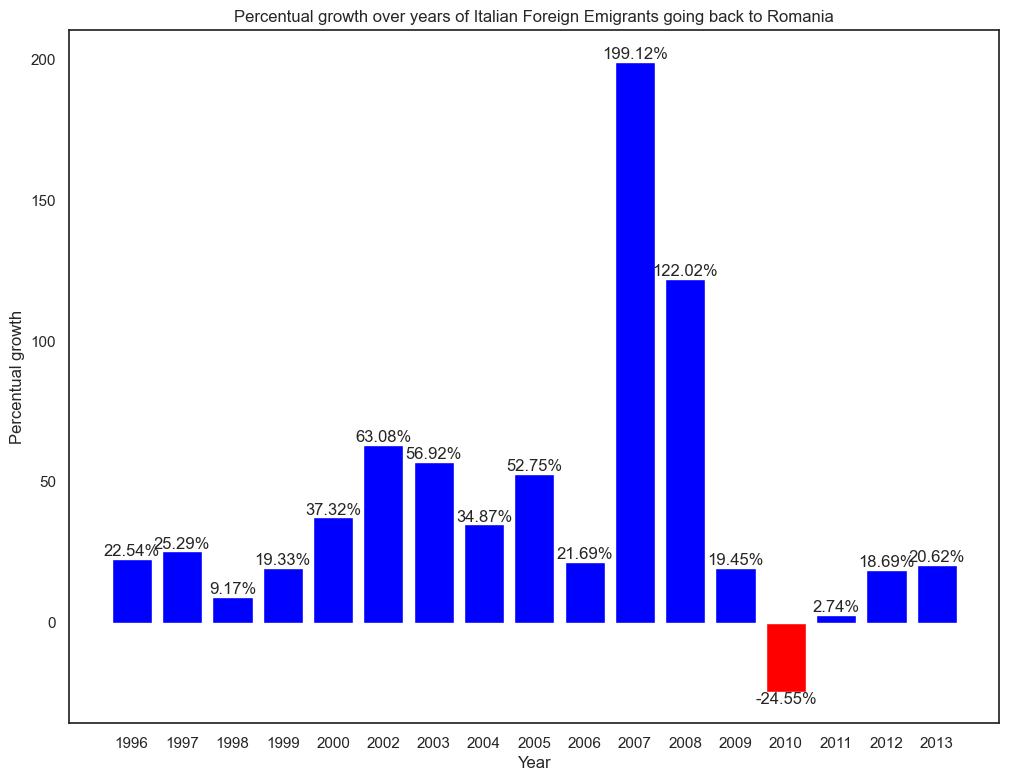

In [162]:
years_to_input = [str(year) for year in range(1996, 2014) if year != 2001]
plt.figure(figsize=(12, 9))
plt.title('Percentual growth over years of Italian Foreign Emigrants going back to ' + country_input)
data = values
colors = ['red' if x < 0 else 'blue' for x in data]
indices = np.arange(len(data))

plt.bar(indices, data, color=colors)

# Add variation percentages below each bar for negative values
for i, value in enumerate(data):
    if np.isnan(value):
        continue
    if value < 0:
        plt.text(i, value, f'{value:.2f}%', ha='center', va='top')
    else:
        plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')
plt.xticks(indices, years_to_input)
plt.xlabel('Year')
plt.ylabel('Percentual growth')



# Romania

In [ ]:
romania_mask = df_sorted_emi['Country'] == 'Romania'
romania_df = df_sorted_emi[romania_mask]

romania_df

,Type,Coverage,Country,AreaName,RegName,DevName,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
136,Emigrants,Foreigners,Romania,Europe,Eastern Europe,Developed regions,71,87,109,119,...,1028,1251,3742,8308,9924,7488,7693,9131,11014,61792


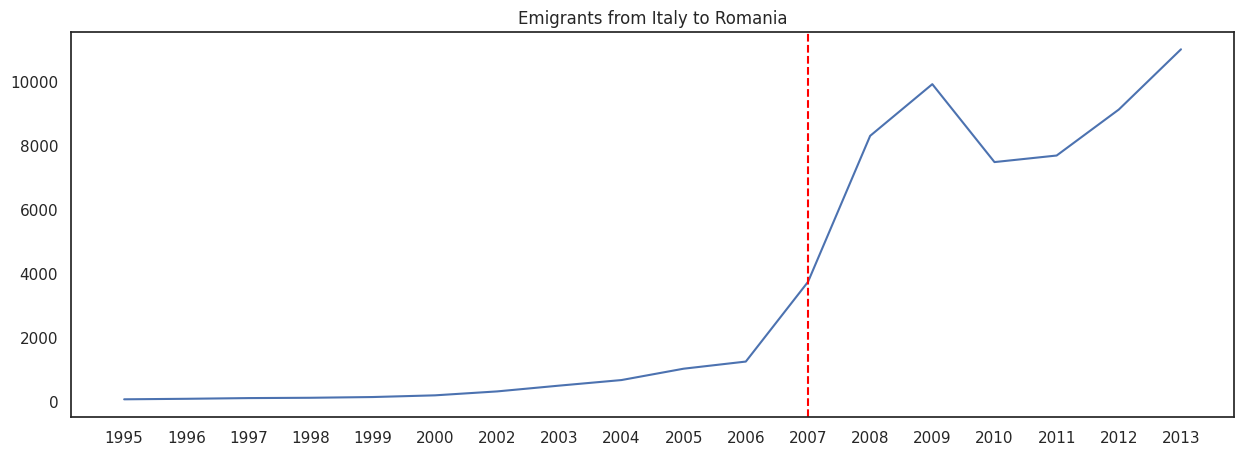

In [ ]:
import plotly.graph_objects as go

years = ['1995', '1996', '1997', '1998', '1999', '2000', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']

romania_data = []
for i in years:
    romania_data.append(romania_df[int(i)])

plt.figure(figsize=(15,5))
plt.plot(years, romania_data)
plt.title('Emigrants from Italy to Romania')
plt.axvline(x='2007', color='red', linestyle='--')





In [ ]:
# remember 2007--> Romania becames part of the Europea Union

# Bulgaria

In [ ]:
bulgaria_mask = df_sorted_emi['Country'] == 'Bulgaria'
bulgaria_df = df_sorted_emi[bulgaria_mask]

bulgaria_df

,Type,Coverage,Country,AreaName,RegName,DevName,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
24,Emigrants,Foreigners,Bulgaria,Europe,Eastern Europe,Developed regions,0,0,0,21,...,85,77,272,540,640,448,401,539,728,3910


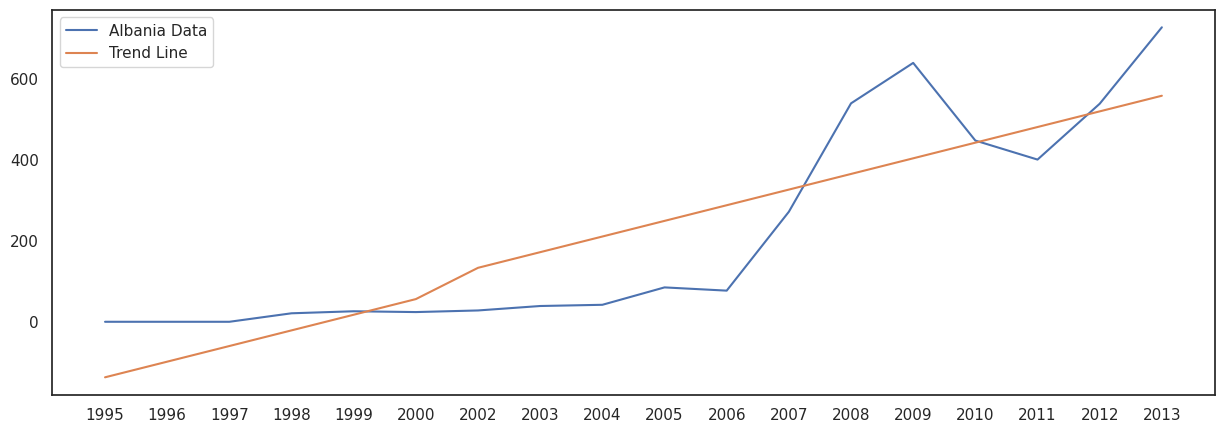

In [ ]:
bulgaria_data = []

for i in years:
  bulgaria_data.append(bulgaria_df[int(i)])

# Convert years and albania_data to NumPy arrays
years = np.array(years, dtype=np.float64)
bulgaria_data = np.array(bulgaria_data, dtype=np.float64)

# Calculate the coefficients of a polynomial fit
coefficients = np.polyfit(years, bulgaria_data, 1)  # Use 1 for a linear trend line

# Generate the trend line values
trend_line = np.polyval(coefficients, years)
years = ['1995', '1996', '1997', '1998', '1999', '2000', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']
plt.figure(figsize=(15, 5))
plt.plot(years, bulgaria_data, label='Albania Data')
plt.plot(years, trend_line, label='Trend Line')
plt.legend()
plt.show()



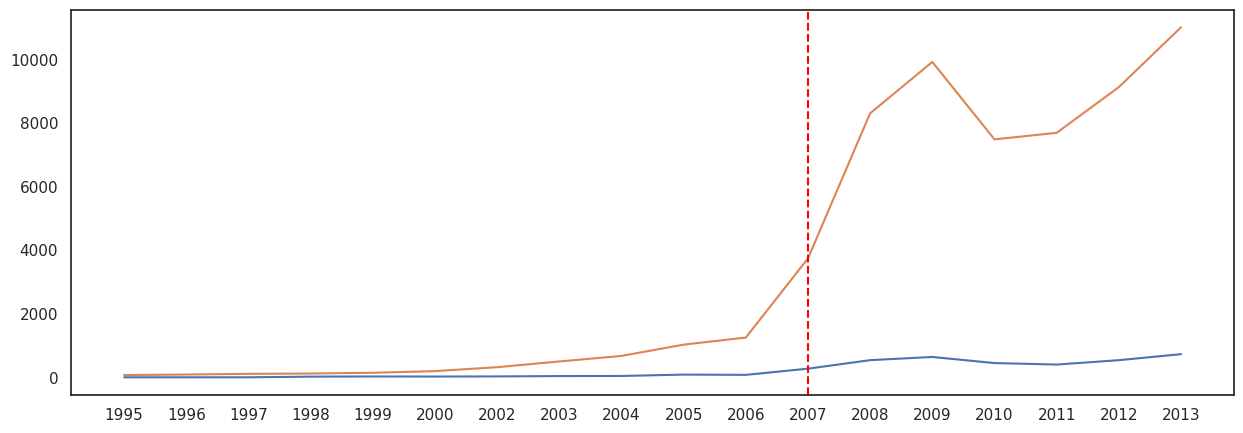

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(years, bulgaria_data)
plt.plot(years, romania_data)
plt.axvline(x='2007', color='red', linestyle='--')

# Albania

In [ ]:
albania_mask = df_sorted_emi['Country'] == 'Albania'
albania_df = df_sorted_emi[albania_mask]

albania_df

,Type,Coverage,Country,AreaName,RegName,DevName,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
1,Emigrants,Foreigners,Albania,Europe,Southern Europe,Developed regions,147,206,197,305,...,929,910,836,925,1110,1495,1525,1794,2296,15395


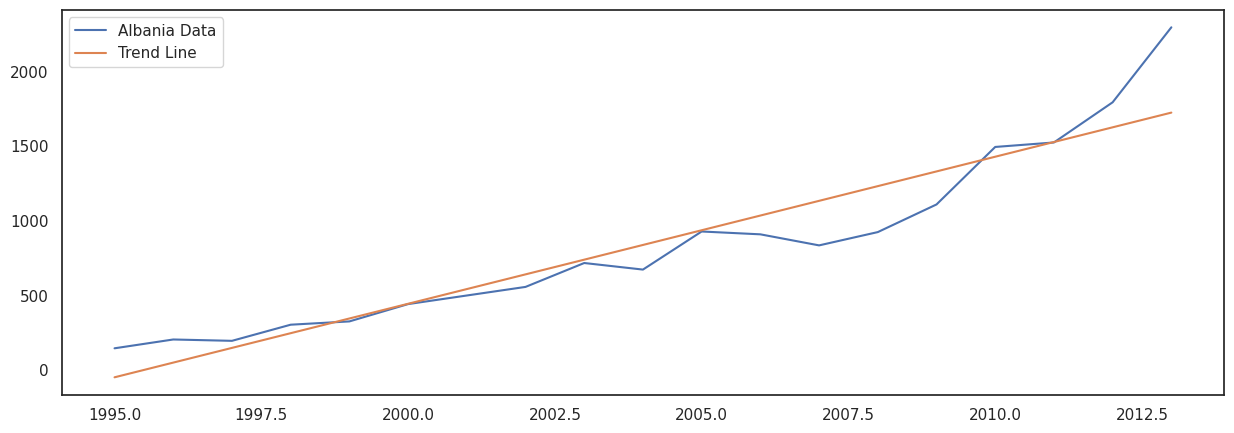

In [ ]:
albania_data = []

for i in years:
    albania_data.append(albania_df[int(i)])

# Convert years and albania_data to NumPy arrays
years = np.array(years, dtype=np.float64)
albania_data = np.array(albania_data, dtype=np.float64)

# Calculate the coefficients of a polynomial fit
coefficients = np.polyfit(years, albania_data, 1)  # Use 1 for a linear trend line

# Generate the trend line values
trend_line = np.polyval(coefficients, years)

plt.figure(figsize=(15, 5))
plt.plot(years, albania_data, label='Albania Data')
plt.plot(years, trend_line, label='Trend Line')
plt.legend()
plt.show()

# Try Some models

In [ ]:
continents = italy_emi_data.groupby('AreaName', axis=0).sum()
print(type(italy_emi_data.groupby('AreaName', axis=0)))
continents_t = continents.T.drop(columns=['World'])
continents = continents_t.T

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


<ipython-input-50-3a38257d103a>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



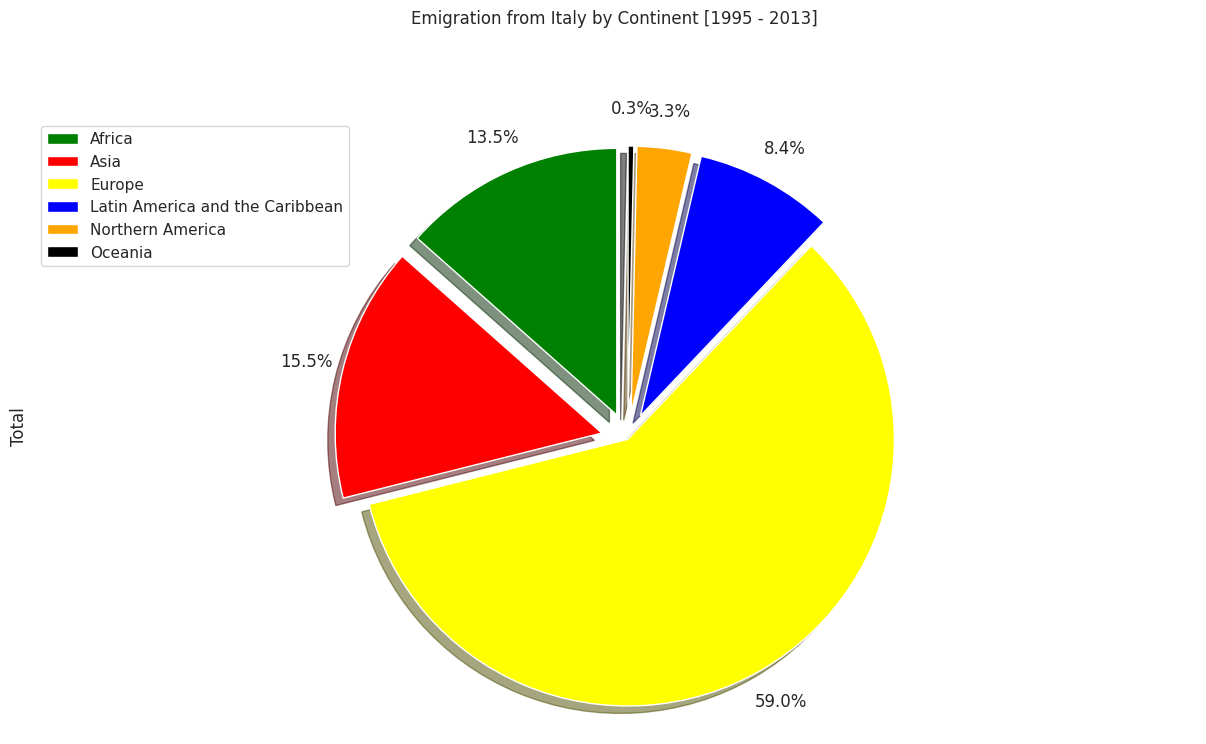

In [ ]:
colors_list = ['green', 'red', 'yellow', 'blue', 'orange', 'black']
explode_list = [0.1, 0.1, 0, 0.1, 0.1, 0.1]

continents['Total'].plot(kind='pie',
                           figsize=(15, 8),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance=1.14,
                           colors=colors_list,
                           explode=explode_list
                           )

plt.title('Emigration from Italy by Continent [1995 - 2013]', y=1.14)
plt.axis('equal')

plt.legend(labels=continents.index, loc='upper left')

plt.show()

In [ ]:

import plotly.express as px

# Create a new DataFrame for the pie chart
pie_df = continents[['Total']].copy()
pie_df.reset_index(inplace=True)

# Set up the colors and explode list
colors_list = ['green', 'red', 'yellow', 'blue', 'orange', 'black']
explode_list = [0.1, 0.1, 0, 0.1, 0.1, 0]

# Create the interactive pie chart using Plotly
fig = px.pie(pie_df, values='Total', names='AreaName', color_discrete_sequence=colors_list,
             title='Immigration to Italy by Continent [1995 - 2013]',
             hover_data={'Total': ':.1f%'})

# Update the layout
fig.update_traces(hoverinfo='label+percent', textinfo='value',
                  marker=dict(line=dict(color='#000000', width=2)))

# Display the interactive plot
fig.show()


In [ ]:
# Create a new DataFrame for the pie chart
pie_df = continents[['Total']].copy()
pie_df.reset_index(inplace=True)

# Set up the colors and explode list
colors_list = ['green', 'red', 'yellow', 'blue', 'orange', 'black']
explode_list = [0.1, 0.1, 0, 0.1, 0.1, 0]

# Create the interactive pie chart using Plotly
fig = px.pie(pie_df, values='Total', names='AreaName', color_discrete_sequence=colors_list,
             title='Immigration to Italy by Continent [1995 - 2013]',
             hover_data={'Total': ':.1f%'})

# Add percentage labels
fig.update_traces(textposition='inside', textinfo='percent+label')

# Update the layout
fig.update_traces(hoverinfo='label', marker=dict(line=dict(color='#000000', width=2)))

# Display the interactive plot
fig.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning:

Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.



In [ ]:
europe = italy_emi_data['AreaName'] == 'Europe'
europe_df = italy_emi_data[europe]


In [ ]:
europe_df_top_5 = europe_df.sort_values('Total')
europe_df_top_5 = europe_df_top_5.tail(5)

europe_df_top_5

,Type,Coverage,Country,AreaName,RegName,DevName,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
60,Emigrants,Foreigners,France,Europe,Western Europe,Developed regions,476,489,406,440,...,582,621,672,559,679,781,786,798,830,12739
131,Emigrants,Foreigners,Poland,Europe,Eastern Europe,Developed regions,110,108,100,129,...,323,567,988,1700,2053,1429,1433,1417,1628,12854
1,Emigrants,Foreigners,Albania,Europe,Southern Europe,Developed regions,147,206,197,305,...,929,910,836,925,1110,1495,1525,1794,2296,15395
64,Emigrants,Foreigners,Germany,Europe,Western Europe,Developed regions,959,663,503,566,...,970,872,1087,1353,1639,1142,1249,1330,1291,20137
136,Emigrants,Foreigners,Romania,Europe,Eastern Europe,Developed regions,71,87,109,119,...,1028,1251,3742,8308,9924,7488,7693,9131,11014,61792


In [ ]:
# Create a new DataFrame for the pie chart
pie_df = europe_df_top_5[['Country', 'Total']].copy()
pie_df.reset_index(inplace=True, drop=True)

# Set up the colors and explode list
colors_list = ['green', 'red', 'yellow', 'blue', 'orange']
explode_list = [0.1, 0.1, 0, 0.1, 0.1]

# Create the interactive pie chart using Plotly
fig = px.pie(pie_df, values='Total', names='Country', color_discrete_sequence=colors_list,
             title='Immigration to Italy from European Countries [1995 - 2013]',
             hover_data={'Total': ':.1f%'})

# Add percentage labels
fig.update_traces(textposition='inside', textinfo='percent+label')

# Update the layout
fig.update_traces(hoverinfo='label', marker=dict(line=dict(color='#000000', width=2)))

# Display the interactive plot
fig.show()


In [ ]:
years_int = list(range(1996, 2001)) + list(range(2002, 2014))
tot = pd.DataFrame(italy_emi_data[years_int].sum(axis=0))
tot.index = map(int, tot.index)
tot.reset_index(inplace = True)
tot.columns = ['year', 'total']
tot

,year,total
0,1996,4721
1,1997,4134
2,1998,7448
3,1999,8102
4,2000,8387
5,2002,9714
6,2003,12425
7,2004,13650
8,2005,15630
9,2006,16637


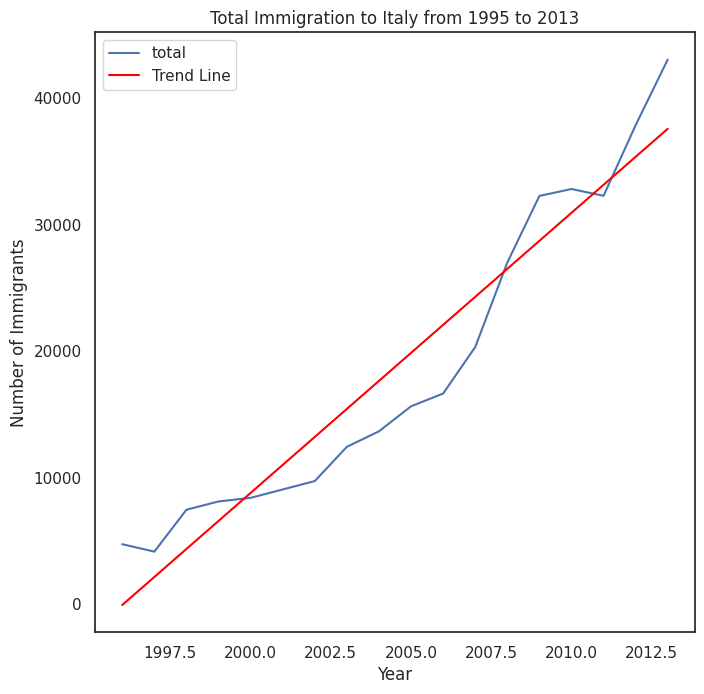

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([1, 1, 1, 1])
tot.plot(x='year', y='total', ax=ax)

# Convert the 'year' and 'total' columns to NumPy arrays
years = tot['year'].values
total = tot['total'].values

# Calculate the coefficients of a polynomial fit
coefficients = np.polyfit(years, total, 1)  # Use 1 for a linear trend line

# Generate the trend line values
trend_line = np.polyval(coefficients, years)

ax.plot(years, trend_line, color='red', label='Trend Line')
ax.set_title('Total Immigration to Italy from 1995 to 2013')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Immigrants')
ax.legend()
plt.show()


In [ ]:
import statsmodels.api as sm

df_prediction = tot.copy()
# Prepare the data for time series forecasting
df_prediction['year'] = pd.to_datetime(df_prediction['year'], format='%Y')
df_prediction.set_index('year', inplace=True)

# Create and fit the ARIMA model
model = sm.tsa.ARIMA(df_prediction['total'], order=(1, 1, 1))
model_fit = model.fit()

# Predict immigration for the next three years
next_years = pd.date_range(start='2014', periods=3, freq='A')
predicted_immigration = model_fit.predict(start=df_prediction.shape[0], end=df_prediction.shape[0]+2)

# Print the predicted values
for year, immigration in zip(next_years, predicted_immigration):
    print(f"Year: {year.year}, Predicted Immigration: {immigration}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Year: 2014, Predicted Immigration: 45768.18684169498
Year: 2015, Predicted Immigration: 48447.409650601025
Year: 2016, Predicted Immigration: 51097.97819677627


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



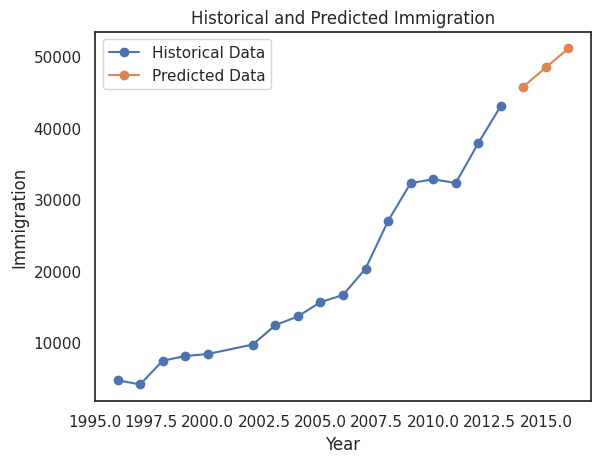

In [ ]:
# Plotting the historical data
years = tot['year'].values
immigration = tot['total'].values

plt.plot(years, immigration, marker='o', linestyle='-', label='Historical Data')

# Plotting the predicted values
next_years = np.arange(2014, 2017)
predicted_immigration = predicted_immigration

plt.plot(next_years, predicted_immigration, marker='o', linestyle='-', label='Predicted Data')

# Adding labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Immigration')
plt.title('Historical and Predicted Immigration')
plt.legend()

# Display the plot
plt.show()


In [ ]:
df_prediction_3 = tot.copy()
# Prepare the data for exponential smoothing
df_prediction_3['year'] = pd.to_datetime(df_prediction_3['year'], format='%Y')
df_prediction_3.set_index('year', inplace=True)

# Create and fit the exponential smoothing model
model = sm.tsa.ExponentialSmoothing(df_prediction_3['total'], trend='add', seasonal=None)
model_fit = model.fit()

# Predict immigration for the next three years
next_years = pd.date_range(start='2014', periods=3, freq='A')
predicted_immigration = model_fit.predict(start=df.shape[0], end=df.shape[0]+2)

# Print the predicted values
for year, immigration in zip(next_years, predicted_immigration):
    print(f"Year: {year.year}, Predicted Immigration: {immigration}")

Year: 2014, Predicted Immigration: 48562.30401929817
Year: 2015, Predicted Immigration: 51317.73479243301
Year: 2016, Predicted Immigration: 54073.165565567855


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



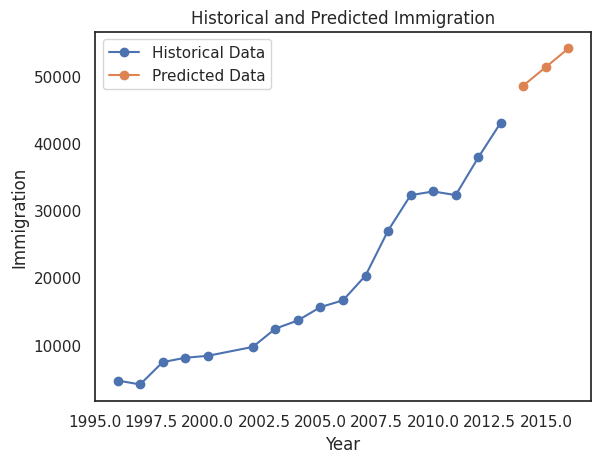

In [ ]:
# Plotting the historical data
years = tot['year'].values
immigration = tot['total'].values

plt.plot(years, immigration, marker='o', linestyle='-', label='Historical Data')

# Plotting the predicted values
next_years = np.arange(2014, 2017)
predicted_immigration = predicted_immigration

plt.plot(next_years, predicted_immigration, marker='o', linestyle='-', label='Predicted Data')

# Adding labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Immigration')
plt.title('Historical and Predicted Immigration')
plt.legend()

# Display the plot
plt.show()

In [ ]:
x = tot['year']
y = tot['total']
fit = np.polyfit(x, y, deg=1)
fit

array([ 2.21573066e+03, -4.42268506e+06])

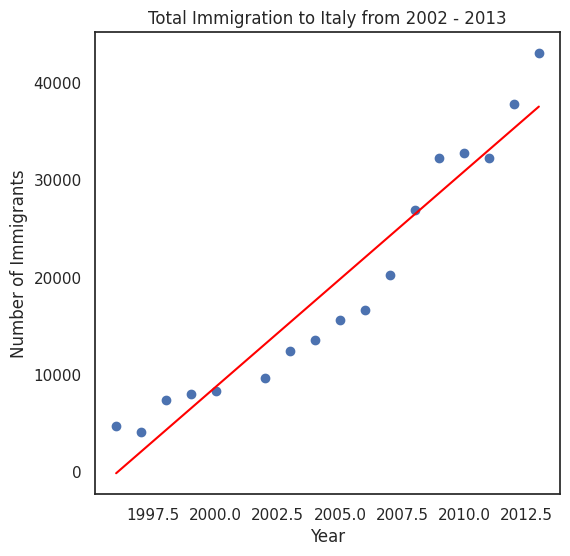

In [ ]:
# Assuming you have a DataFrame named 'tot' with columns 'year' and 'total'
plt.figure(figsize=(6, 6))
plt.scatter(tot['year'], tot['total'])
plt.title('Total Immigration to Italy from 2002 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# Assuming you have defined 'x' and 'fit' appropriately
plt.plot(x, fit[0] * x + fit[1], color='red')

plt.show()


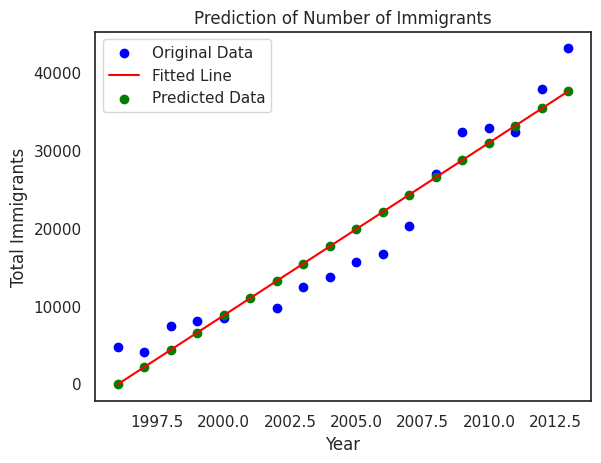

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = tot['year']
y = tot['total']

fit = np.polyfit(x, y, deg=1)

# Generate x values for prediction (next years)
x_pred = np.arange(min(x), max(x) + 1)

# Predict the corresponding y values using the fitted line
y_pred = fit[0] * x_pred + fit[1]

# Plot the original data points
plt.scatter(x, y, color='blue', label='Original Data')

# Plot the fitted line
plt.plot(x_pred, y_pred, color='red', label='Fitted Line')

# Plot the predicted values for next years
plt.scatter(x_pred, y_pred, color='green', label='Predicted Data')

plt.title('Prediction of Number of Immigrants')
plt.xlabel('Year')
plt.ylabel('Total Immigrants')
plt.legend()
plt.show()


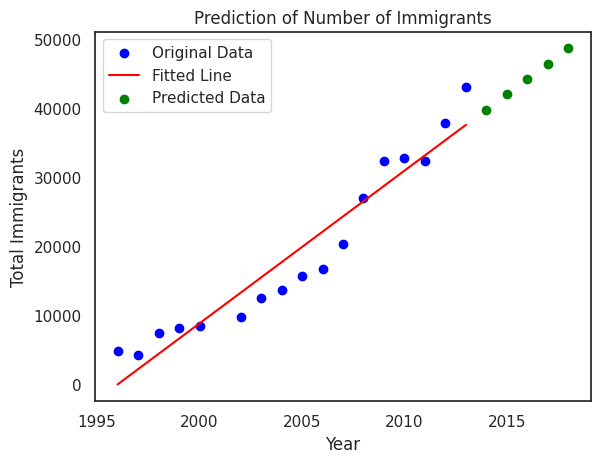

R-squared Score: 0.9230543182202978


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

x = tot['year']
y = tot['total']

fit = np.polyfit(x, y, deg=1)

# Generate x values for prediction (next years)
x_pred = np.arange(max(x)+1, max(x) + 6)  # Predicting for next 5 years (adjust as needed)

# Predict the corresponding y values using the fitted line
y_pred = fit[0] * x_pred + fit[1]

# Plot the original data points
plt.scatter(x, y, color='blue', label='Original Data')

# Plot the fitted line
plt.plot(x, fit[0] * x + fit[1], color='red', label='Fitted Line')

# Plot the predicted values for next years
plt.scatter(x_pred, y_pred, color='green', label='Predicted Data')

plt.title('Prediction of Number of Immigrants')
plt.xlabel('Year')
plt.ylabel('Total Immigrants')
plt.legend()
plt.show()

r2 = r2_score(y, fit[0] * x + fit[1])
print("R-squared Score:", r2)


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning:

Polyfit may be poorly conditioned



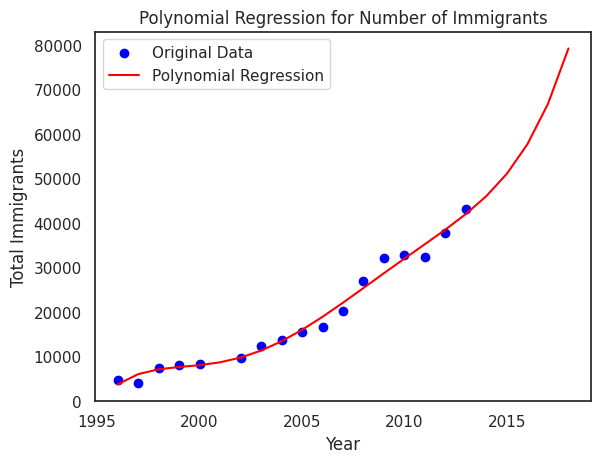

R-squared Score: 0.9837136545272731


In [ ]:
x = tot['year']
y = tot['total']

# Perform polynomial regression
degree = 6  # Adjust the degree of the polynomial as needed
coefficients = np.polyfit(x, y, deg=degree)
poly = np.poly1d(coefficients)

# Generate x values for prediction (including future years)
x_pred = np.arange(min(x), max(x) + 6)  # Predicting for next 5 years (adjust as needed)

# Predict the corresponding y values using the polynomial regression
y_pred = poly(x_pred)

# Plot the original data points
plt.scatter(x, y, color='blue', label='Original Data')

# Plot the polynomial regression line
plt.plot(x_pred, y_pred, color='red', label='Polynomial Regression')

plt.title('Polynomial Regression for Number of Immigrants')
plt.xlabel('Year')
plt.ylabel('Total Immigrants')
plt.legend()
plt.show()

# Calculate R-squared score for the polynomial regression
y_pred_train = poly(x)
r2 = r2_score(y, y_pred_train)
print("R-squared Score:", r2)


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning:

Polyfit may be poorly conditioned



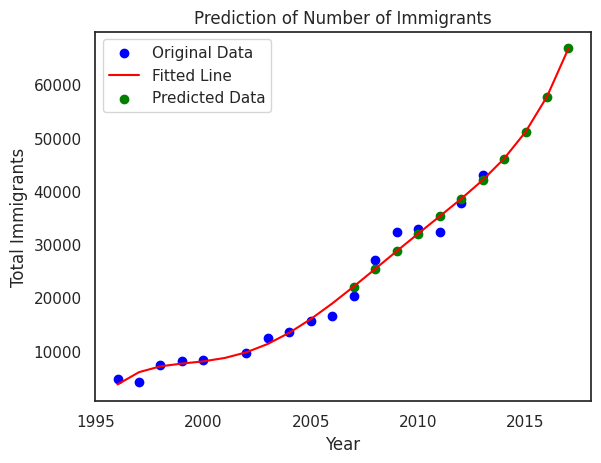

R-squared Score: 0.9837136545272731


In [ ]:
#polynomial prevision 5 years

x = tot['year']
y = tot['total']

# Perform polynomial regression
degree = 6  # Adjust the degree of the polynomial as needed
coefficients = np.polyfit(x, y, deg=degree)
poly = np.poly1d(coefficients)

# Generate x values for prediction (including future years)
x_pred = np.arange(min(x), max(x) + 5)  # Extend by 5 years

# Predict the corresponding y values using the polynomial regression
y_pred = poly(x_pred)

# Plot the original data points
plt.scatter(x, y, color='blue', label='Original Data')

# Plot the fitted line
plt.plot(x_pred, y_pred, color='red', label='Fitted Line')

# Plot the predicted values for future years
plt.scatter(x_pred[-11:], y_pred[-11:], color='green', label='Predicted Data')

plt.title('Prediction of Number of Immigrants')
plt.xlabel('Year')
plt.ylabel('Total Immigrants')
plt.legend()
plt.show()

# Calculate R-squared score for the polynomial regression
y_pred_train = poly(x)
r2 = r2_score(y, y_pred_train)
print("R-squared Score:", r2)


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning:

Polyfit may be poorly conditioned



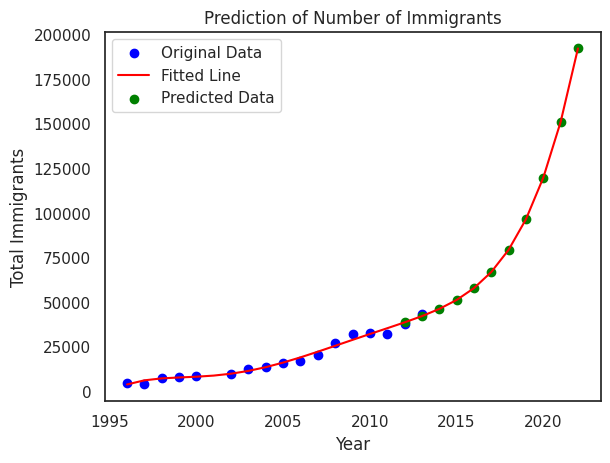

R-squared Score: 0.9837136545272731


In [ ]:
# polynomial prevision 10 years

x = tot['year']
y = tot['total']

# Perform polynomial regression
degree = 6  # Adjust the degree of the polynomial as needed
coefficients = np.polyfit(x, y, deg=degree)
poly = np.poly1d(coefficients)

# Generate x values for prediction (including future years)
x_pred = np.arange(min(x), max(x) + 10)  # Extend by 10 years

# Predict the corresponding y values using the polynomial regression
y_pred = poly(x_pred)

# Plot the original data points
plt.scatter(x, y, color='blue', label='Original Data')

# Plot the fitted line
plt.plot(x_pred, y_pred, color='red', label='Fitted Line')

# Plot the predicted values for future years
plt.scatter(x_pred[-11:], y_pred[-11:], color='green', label='Predicted Data')

plt.title('Prediction of Number of Emigrants')
plt.xlabel('Year')
plt.ylabel('Total Immigrants')
plt.legend()
plt.show()

# Calculate R-squared score for the polynomial regression
y_pred_train = poly(x)
r2 = r2_score(y, y_pred_train)
print("R-squared Score:", r2)